# Introduction




# Prepare for analysis

## Load packages

In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

Matplotlib is building the font cache; this may take a moment.


In [ ]:
!pip install pandas scikit-learn wordcloud seaborn


In [6]:
# TODO: Add all hard coded parameters like file paths or model parameters here
TRAIN_PATH = "train.csv"

## Read the data

In [7]:
train_df = pd.read_csv(TRAIN_PATH)

# TODO: Put the path at the top of the script and replace with variable
test_df = pd.read_csv("test.csv")

# Preliminary data inspection

## Quick glimpse of the data
TODO: Think if you can abstract away much here.

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Few statistics on the data

### Missing data

In [14]:
# TODO: turn into function
total = train_df.isnull().sum()
percent = (train_df.isnull().sum()/train_df.isnull().count()*100)
tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
types = []
for col in train_df.columns:
    dtype = str(train_df[col].dtype)
    types.append(dtype)
tt['Types'] = types
df_missing_train = np.transpose(tt)

In [15]:
# TODO: turn into function
total = test_df.isnull().sum()
percent = (test_df.isnull().sum()/test_df.isnull().count()*100)
tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
types = []
for col in test_df.columns:
    dtype = str(test_df[col].dtype)
    types.append(dtype)
tt['Types'] = types
df_missing_test = np.transpose(tt)

### Most frequent data

In [16]:
# TODO: turn into function
total = train_df.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
items = []
vals = []
for col in train_df.columns:
    try:
        itm = train_df[col].value_counts().index[0]
        val = train_df[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    except Exception as ex:
        print(ex)
        items.append(0)
        vals.append(0)
        continue
tt['Most frequent item'] = items
tt['Frequence'] = vals
tt['Percent from total'] = np.round(vals / total * 100, 3)
np.transpose(tt)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,891,0,3,"Dooley, Mr. Patrick",male,24.0,0,0,CA. 2343,8.05,G6,S
Frequence,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [17]:
# TODO: turn into function
total = test_df.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
items = []
vals = []
for col in test_df.columns:
    try:
        itm = test_df[col].value_counts().index[0]
        val = test_df[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    except Exception as ex:
        print(ex)
        items.append(0)
        vals.append(0)
        continue
tt['Most frequent item'] = items
tt['Frequence'] = vals
tt['Percent from total'] = np.round(vals / total * 100, 3)
np.transpose(tt)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Most frequent item,1309,3,"Peter, Master. Michael J",male,21.0,0,0,PC 17608,7.75,B57 B59 B63 B66,S
Frequence,1,218,1,266,17,283,324,5,21,3,270
Percent from total,0.239,52.153,0.239,63.636,5.12,67.703,77.512,1.196,5.036,3.297,64.593


### Unique values

In [18]:
# TODO: turn into function
total = train_df.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
uniques = []
for col in train_df.columns:
    unique = train_df[col].nunique()
    uniques.append(unique)
tt['Uniques'] = uniques
np.transpose(tt)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [19]:
# TODO: turn into function
total = test_df.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
uniques = []
for col in test_df.columns:
    unique = test_df[col].nunique()
    uniques.append(unique)
tt['Uniques'] = uniques
np.transpose(tt)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Uniques,418,3,418,2,79,7,8,363,169,76,3


# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [20]:
# TODO: turn into function
def merge_and_label_sets(train_df, test_df):
    all_df = pd.concat([train_df, test_df], axis=0)
    all_df["set"] = "train"
    all_df.loc[all_df.Survived.isna(), "set"] = "test"
    return all_df

In [25]:
all_df = merge_and_label_sets(train_df, test_df)

In [26]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [ ]:
# Plot count pairs "Sex"
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Sex", data=all_df, hue="set", palette= color_list)
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
ax.set_title("Number of passengers / Sex")
plt.show()

In [ ]:
# Plot distribution pairs for "Sex" and hue as "Survived"
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]
f, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, h in enumerate(train_df["Survived"].unique()):
    g = sns.histplot(train_df.loc[train_df["Survived"]==h, "Sex"], 
                                  color=color_list[i], 
                                  ax=ax, 
                                  label=h)
ax.set_title("Number of passengers / Sex")
g.legend()
plt.show()

In [ ]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked

In [ ]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked and use "Survived" as hue.

In [ ]:
# Plot distribution pairs for Age and Fare

In [ ]:
# Plot distribution pairs for Age and Fare using "Survived" as hue

## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

In [28]:
# TODO: turn into function
def add_family_size_column(df):
    # Add a "Family Size" column by combining "SibSp", "Parch", and adding 1
    df["Family Size"] = df["SibSp"] + df["Parch"] + 1
    return df


In [29]:
# TODO: turn into function
def add_family_size_to_train(train_df):
    # Add a "Family Size" column to train_df by combining "SibSp", "Parch", and adding 1
    train_df["Family Size"] = train_df["SibSp"] + train_df["Parch"] + 1
    return train_df


In [ ]:
# Plot count pairs using all_df for the column "Family Size" and use "Survived" as hue.

## Age interval

In [30]:
# TODO: turn into function
def assign_age_interval(df):
    df["Age Interval"] = 0.0
    df.loc[df['Age'] <= 16, 'Age Interval'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age Interval'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age Interval'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age Interval'] = 3
    df.loc[df['Age'] > 64, 'Age Interval'] = 4

    return df

all_df = assign_age_interval(all_df)


In [31]:
# TODO: turn into function
def train_df(df): 
 train_df = assign_age_interval(train_df)
 return df


In [32]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set,Age Interval
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,2.0


In [ ]:
# Plot count pairs using all_df for the column "Age Interval" and use "Survived" as hue.

## Fare interval

In [48]:
# TODO: turn into function
def assign_fare_interval(df):
    df['Fare Interval'] = 0.0
    df.loc[df['Fare'] <= 7.91, 'Fare Interval'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare Interval'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare Interval'] = 2
    df.loc[df['Fare'] > 31, 'Fare Interval'] = 3

    return df
all_df = assign_fare_interval(all_df)

In [34]:
# TODO: turn into function
def train_df(df):
   train_df = assign_fare_interval(train_df)
   return df

In [ ]:
# Plot count pairs using all_df for the column "Fare Interval"

Let's create a composed feature: Pclass + Sex.

In [35]:
# TODO: turn into function
def create_sex_pclass_column(df):
    df["Sex_Pclass"] = df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)
    return df


In [36]:
# TODO: turn into function
def process_all_df(df):
    process_all_df = create_sex_pclass_column(all_df)
    return df

In [ ]:
# Plot count pairs using all_df for the column "Fare Interval" and "Fare (grouped by survival)" with "Survived" as hue

## Process names


When we process names, we would like to extract the following information:

- Family name - this is the first word (or few first words, if a family name with multiple names), followed by a comma  
- Title - this follows just after the comma   
- Given name - this is the word or group of words following family name  
- Maiden name - for ladies, is given between parantheses  

We start with creating a function that parses the Name string and extract (if possible) these 4 elements


In [37]:
# TODO: also move this function to a separate file
def parse_names(row):
    try:
        text = row["Name"]
        split_text = text.split(",")
        family_name = split_text[0]
        next_text = split_text[1]
        split_text = next_text.split(".")
        title = (split_text[0] + ".").lstrip().rstrip()
        next_text = split_text[1]
        if "(" in next_text:
            split_text = next_text.split("(")
            given_name = split_text[0]
            maiden_name = split_text[1].rstrip(")")
            return pd.Series([family_name, title, given_name, maiden_name])
        else:
            given_name = next_text
            return pd.Series([family_name, title, given_name, None])
    except Exception as ex:
        print(f"Exception: {ex}")
    
    

In [38]:
# TODO: turn into function
def apply_name_parsing(df):
    df[["Family Name", "Title", "Given Name", "Maiden Name"]] = df.apply(lambda row: parse_names(row), axis=1)
    return df


In [39]:
# TODO: turn into function
def train_df(df):
    df[["Family Name", "Title", "Given Name", "Maiden Name"]] = df.apply(lambda row: parse_names(row), axis=1)
    return df

## Multivariate analysis


Let's look now to the interaction of multiple features.

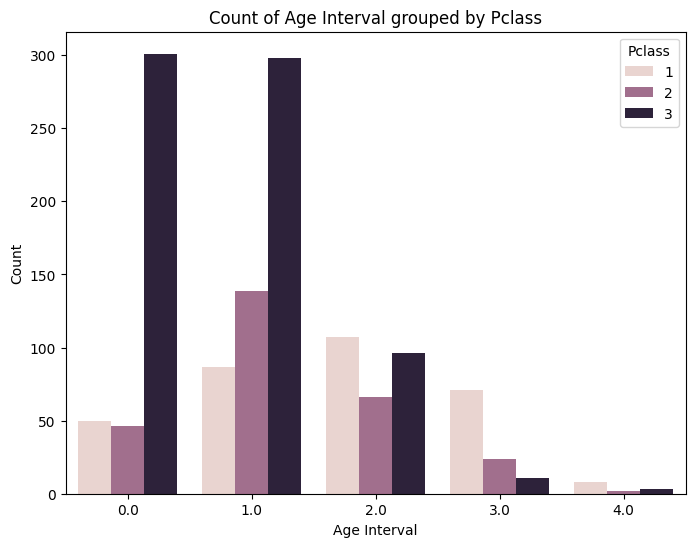

In [49]:
# TODO: Plot count pairs of "Age Interval" grouped by "Pclass"
plt.figure(figsize=(8, 6))
sns.countplot(data=all_df, x="Age Interval", hue="Pclass")
plt.title('Count of Age Interval grouped by Pclass')
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()

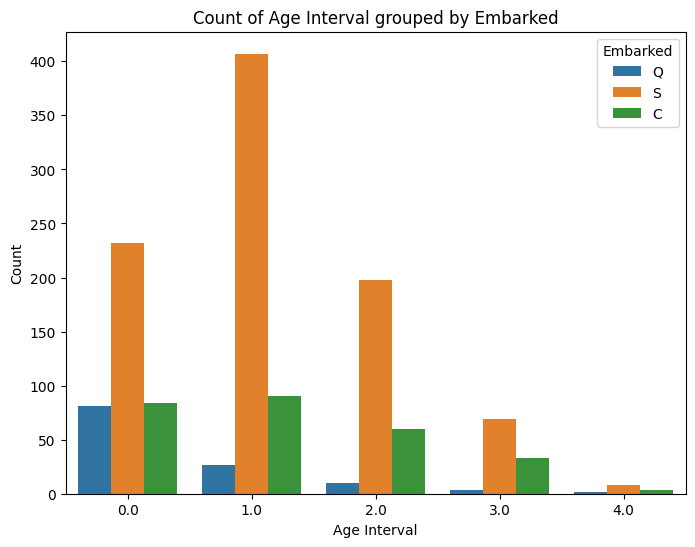

In [50]:
# TODO: Plot count pairs of "Age Interval" grouped by "Embarked"
plt.figure(figsize=(8, 6))
sns.countplot(data=all_df, x="Age Interval", hue="Embarked")
plt.title('Count of Age Interval grouped by Embarked')
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.legend(title='Embarked')
plt.show()

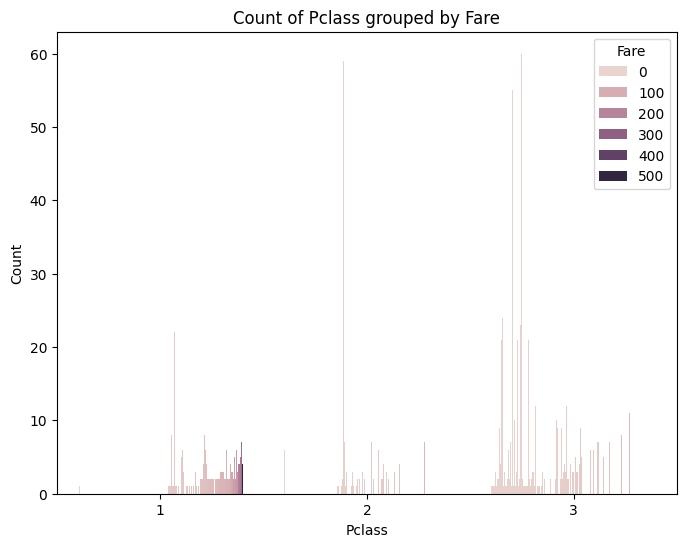

In [51]:
# TODO: Plot count pairs of "Pclass" grouped by "Fare Interval"
plt.figure(figsize=(8, 6))
sns.countplot(data=all_df, x="Pclass", hue="Fare")
plt.title('Count of Pclass grouped by Fare')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Fare')
plt.show()

### Few more engineered data 


Let's create two more engineered features:  
* Family size interval: Single, Small, Large  
* Aggregated titles: Mr, Mrs, Master, Miss, and Rare  

In [40]:
# TODO: turn into function
def add_family_type(datasets):
    # Iterate over the list of datasets and create the "Family Type" column
    for dataset in datasets:
        dataset["Family Type"] = dataset["Family Size"]
    return datasets

In [41]:
# TODO: turn into function
def classify_family_type(all_df, train_df):
    for dataset in [all_df, train_df]:
        dataset.loc[dataset["Family Size"] == 1, "Family Type"] = "Single"
        dataset.loc[(dataset["Family Size"] > 1) & (dataset["Family Size"] < 5), "Family Type"] = "Small"
        dataset.loc[dataset["Family Size"] >= 5, "Family Type"] = "Large"
    return dataset


In [ ]:
for dataset in [all_df, train_df]:
    dataset["Titles"] = dataset["Title"]

In [43]:
# TODO: turn into function
def unify_titles(datasets):
    """
    This function standardizes the Titles column in the datasets by unifying different forms of titles.
    It replaces specific titles with standard ones and groups rare titles under 'Rare'.
    """
    for dataset in datasets:
        # Unify `Miss`
        dataset['Titles'] = dataset['Titles'].replace(['Mlle.', 'Ms.'], 'Miss.')
        
        # Unify `Mrs`
        dataset['Titles'] = dataset['Titles'].replace('Mme.', 'Mrs.')
        
        # Unify rare titles
        rare_titles = ['Lady.', 'the Countess.', 'Capt.', 'Col.', 'Don.', 'Dr.', 
                       'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.']
        dataset['Titles'] = dataset['Titles'].replace(rare_titles, 'Rare')
    
    return datasets


In [44]:
# TODO: turn into function
def calculate_mean_survival(df):
    return df[['Titles', 'Sex', 'Survived']].groupby(['Titles', 'Sex'], as_index=False).mean()


# Baseline model

## Feature engineering: Map categorical value to numerical values

In [98]:
# TODO: turn into function
for dataset in [train_df, test_df]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

Create train-validation split.

In [99]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

Define predictor features and target feature.

In [100]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

Define the training and validation data and labels.

In [101]:
# TODO: turn into function
train_X = train[predictors]
train_Y = train[target].values
valid_X = valid[predictors]
valid_Y = valid[target].values

Initialize the classifiction algorithm.

In [102]:
# TODO: could this and the following code cells be turned into a function that returns the prediction?
clf = RandomForestClassifier(n_jobs=-1, 
                             random_state=42,
                             criterion="gini",
                             n_estimators=100,
                             verbose=False)

Fit the classifier with the training data.

In [ ]:
clf.fit(train_X, train_Y)

Predict the train data (to check the training classification error).

In [104]:
preds_tr = clf.predict(train_X)

Predict the validation data.

In [105]:
preds = clf.predict(valid_X)

# Evaluation

## Classification report for training data.

In [ ]:
print(metrics.classification_report(train_Y, preds_tr, target_names=['Not Survived', 'Survived']))

Classification report for validation data.

In [ ]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))